In [ ]:
import pennylane as qml
import openqasm3
from openqasm3.parser import parse
import numpy as np

import matplotlib.pyplot as plt
qml.drawer.use_style("black_white")

dev = qml.device("default.qubit", wires=2)

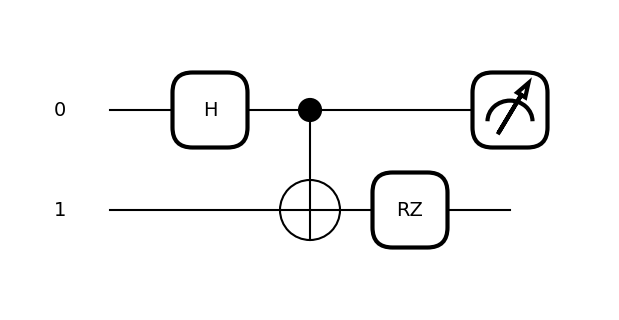

In [23]:
@qml.qnode(dev)
def circuit_1(theta):
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.RZ(theta, wires=1)
    return qml.expval(qml.PauliZ(0))

fig, ax = qml.draw_mpl(circuit_1)(0.54)
plt.show()

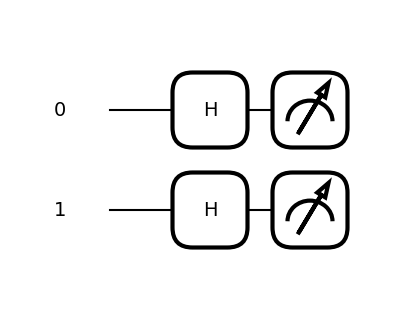

In [24]:
@qml.qnode(dev)
def circuit_2():
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    return qml.probs(wires=[0, 1])

fig, ax = qml.draw_mpl(circuit_2)()
plt.show()

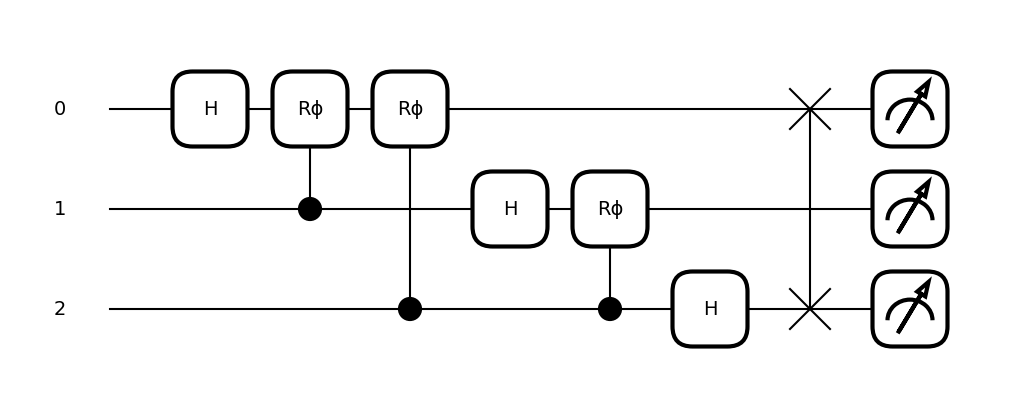

In [25]:
@qml.qnode(dev)
def qft_circuit():
    qml.Hadamard(wires=0)
    qml.ControlledPhaseShift(np.pi/2, wires=[1, 0])
    qml.ControlledPhaseShift(np.pi/4, wires=[2, 0])
    
    qml.Hadamard(wires=1)
    qml.ControlledPhaseShift(np.pi/2, wires=[2, 1])
    
    qml.Hadamard(wires=2)
    qml.SWAP(wires=[0, 2])
    
    return qml.probs(wires=[0, 1, 2])

fig, ax = qml.draw_mpl(qft_circuit)()
plt.show()

In [26]:
def validate_qasm(qnode, *args, **kwargs):
    # convert to QASM
    qasm_str = qml.to_openqasm(qnode)(*args, **kwargs)
    
    print("-" * 30)
    print(f"Validating Circuit: {qnode.__name__}")
    
    try:
        # This parses the string against the QASM 3.0 grammar
        parse(qasm_str)
        print("Success: QASM is valid according to QASM 3.0 grammar.")
        return qasm_str
    except Exception as e:
        print(f"Grammar Error: {e}")
        return None

In [27]:
qasm1 = validate_qasm(circuit_1, 0.54)
qasm2 = validate_qasm(circuit_2)
qasm3 = validate_qasm(qft_circuit)

------------------------------
Validating Circuit: circuit_1
Success: QASM is valid according to QASM 3.0 grammar.
------------------------------
Validating Circuit: circuit_2
Success: QASM is valid according to QASM 3.0 grammar.
------------------------------
Validating Circuit: qft_circuit
Success: QASM is valid according to QASM 3.0 grammar.
